# HW3 - Classification with Support Vector Machine
## Naive Handwriting Recognition System

#### Data Science in Korea University
#### COSE471, Spring 2015
#### Due : 5/24 (SUN)  11:59 PM 


## [ For Mac users, please make sure that your file runs on Windows! ]


## Preparing the Data

Put our traing examples and testing examples in your "IPython Notebook" folder or your original directory for your source
(train folder, test folder)




###We will go through the following steps:
* Read the files from folder
* Convert from the image(32X32) format to the list(1X1024) format
* Train your Training files with SVM library
* Predict Test files with your trained SVM model
* Measure your accuracy for your Test
* Compare with other Classificaiton Models ( 1 or 2 model)

To give you some starting points for your homework, we will also show the different sub-steps that can be taken to reach the presented solution.

## 0. Prepare your Data

Make sure your traning examples and testing examples in your "IPython Notebook" directory

In [2]:
import os
import numpy as np

## 1. Preprocess your Data

* Read the files from folder

* For Training Data / Convert from the image(32X32) format to the list(1X1024) format
* For Training Label(Answer for Data) / Name of the file

## 2. Train your Training files with SVM library

* Refer to this link
* http://scikit-learn.org/stable/modules/svm.html
* Try to set your parameter for SVM model

In [3]:
training = np.genfromtxt('/Users/hee/Practice_Python/DataScience/CreditScoring/training.csv',delimiter=',')

In [4]:
print training
print training.shape

training = training[1:,:] # eliminate 'column name' row [nan nan nan ... nan]
print training.shape

y = training[:, 1] #SeriousDlqin2yrs
x = training[:, 2:] # 10 features
print x.shape
print y.shape

[[             nan              nan              nan ...,              nan
               nan              nan]
 [  4.20820000e+04   1.00000000e+00   1.17350929e+00 ...,   0.00000000e+00
    2.00000000e+00   2.00000000e+00]
 [  4.74630000e+04   0.00000000e+00   4.01181850e-02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  5.75000000e+04   0.00000000e+00   8.17888577e-01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.29582000e+05   1.00000000e+00   9.48217769e-01 ...,   2.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [  9.01260000e+04   0.00000000e+00   1.12952920e-01 ...,   2.00000000e+00
    0.00000000e+00   0.00000000e+00]]
(90001, 12)
(90000, 12)
(90000, 10)
(90000,)


In [5]:
# fill nan with zeros

x = np.nan_to_num(x)
y = np.nan_to_num(y)

In [6]:
print x.shape
print y.shape

from sklearn.svm import SVC
xpart = x[:10000, :] # kernel = 'rbf' (default)일 때, 30000개까지 가능. 
                    # kernel = 'linear'일 때, 100개 가능, 1000개 불가능.
ypart = y[:10000]

print xpart.shape
print ypart.shape
#write your code here

# Train
clf = SVC(probability = True) # probability = True
clf.fit(xpart, ypart)

(90000, 10)
(90000,)
(10000, 10)
(10000,)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## 3. Predict Test files with your trained SVM model

* Read the files from folder

* For Test Data / Convert from the image(32X32) format to the list(1X1024) format
* For Test Label(Answer for Data) / Name of the file

In [9]:
# load test set

test = np.genfromtxt('/Users/hee/Practice_Python/DataScience/CreditScoring/test.csv',delimiter=',')

In [10]:
test = test[1:,:]

ytest = test[:, 1]
xtest = test[:, 2:]
xtest.shape
ytest.shape
# fill nan with zeros
xtest = np.nan_to_num(xtest)
ytest = np.nan_to_num(ytest)

In [11]:


prediction = clf.predict_proba(xtest)


In [13]:
print prediction # [0일 확률  1일 확률]
print prediction.shape

[[ 0.89607888  0.10392112]
 [ 0.93449429  0.06550571]
 [ 0.76182186  0.23817814]
 ..., 
 [ 0.93446741  0.06553259]
 [ 0.92338567  0.07661433]
 [ 0.9394169   0.0605831 ]]
(30000, 2)


In [25]:
pred = prediction[:, 1] # 1일 확률
label = pred > 0.1 # 0.1이상일 때, 1이라고 예측하자

## 4. Measure your accuracy for your Test Data

* Accuracy = (nubmer of correct answers) / (all number of documents)

In [17]:
from scipy.optimize import fmin_cg
from sklearn.metrics import precision_recall_fscore_support

def predict(theta, X, y, threshold = 0.5):
    '''
    theta
    X
    y
    L
    
        prints measures (accuracy, precision, recall, F-score)
    
    returns: prediction(vector) 
            
    '''
    # get prediction
    prediction = getPrediction(theta, X, threshold)
    
    # get measures
    measures = getMeasures(y, prediction)
    accuracy, precision, recall, fscore = measures
    
    print 'accuracy', accuracy
    print 'precision', precision
    print 'recall', recall
    print 'fscore', fscore
    
    return prediction

def getPrediction(theta, X, threshold = 0.5):
    '''
    
    returns: vector of labels (0, 1)
    '''
    
    probability = sigmoid(X.dot(theta))
    prediction = probability > threshold
    
    return prediction * 1

def getMeasures(y, prediction):
    '''
    
    returns: measures
    '''
    accuracy = (prediction == y).mean()
    
    precision, recall, f_score, support = \
        precision_recall_fscore_support(y, prediction, average = 'binary')
    
    measures = (accuracy, precision, recall, f_score)
    return measures

In [26]:
measures= getMeasures(ytest, label)
print measures # ㅁㅊ

(0.91846666666666665, 0.11130742049469965, 0.03140578265204387, 0.048989113530326596)


In [16]:
#write your code here
accuracy = np.mean(label == ytest)
print accuracy

0.932933333333


In [ ]:
from sklearn.learning_curve import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(clf, x, y, train_sizes=range(100, 60000, 5000))

(0, 1.0)

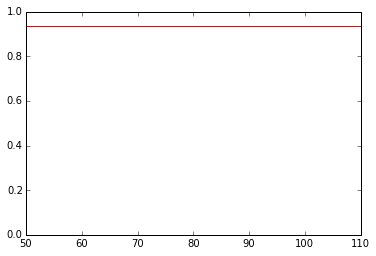

In [11]:
% matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_sizes, train_scores)
plt.plot(train_sizes, valid_scores)
plt.ylim(0)
plt.legend(loc='best')

## 5. Compare with other Classificaiton Models ( 1 or 2 model)

* Compare your results and Show your analysis for each results
* You can also analyse about different types of parameter for SVM
* You are welcome to use all kinds of libraries

##TABLE OF CONTENTS

###I. Logistic Regression
    1. Train
    2. Predict
    3. Accuracy
    4. Compare with SVM
    
###II. Modify parameters for SVM
    1. C
    2. kernel
    3. degree

##II. Modify Parameters for SVM

In [12]:
# 1. C
accuracyList = []
for i in np.linspace(1, 20, 20):
    clf = SVC(C = i)
    clf.fit(x, y)
    prediction = clf.predict(x)
    accuracy = np.mean(prediction == y)
    accuracyList.append(accuracy)
    print 'When C = %d, accuracy is %f.' % (i, accuracy)
    


When C = 1, accuracy is 0.979835.
When C = 2, accuracy is 0.988625.
When C = 3, accuracy is 0.992761.
When C = 4, accuracy is 0.994312.
When C = 5, accuracy is 0.996381.
When C = 6, accuracy is 0.997415.
When C = 7, accuracy is 0.998449.
When C = 8, accuracy is 0.998966.
When C = 9, accuracy is 0.998966.
When C = 10, accuracy is 0.998966.
When C = 11, accuracy is 0.999483.
When C = 12, accuracy is 1.000000.
When C = 13, accuracy is 1.000000.
When C = 14, accuracy is 1.000000.
When C = 15, accuracy is 1.000000.
When C = 16, accuracy is 1.000000.
When C = 17, accuracy is 1.000000.
When C = 18, accuracy is 1.000000.
When C = 19, accuracy is 1.000000.
When C = 20, accuracy is 1.000000.


In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.linspace(1, 20, 20), accuracyList, label = 'Accuracy')

plt.legend(loc='best')
plt.xticks(rotation=70) 
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("C - Accuracy relationship")

With increasing C, accuracy increases as well, however to a certain level.

In [ ]:
# 2. kernel
accuracyListK = []
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = SVC(kernel = i)
    clf.fit(x, y)
    prediction = clf.predict(xTest)
    accuracy = np.mean(prediction == yTest)
    accuracyListK.append(accuracy)
    print 'When kernel = %s, accuracy is %f.' % (i, accuracy)


From highest accuracy to lowest accuracy: linear > rbf > poly > sigmoid

With 'linear' kernel, accuracy was the highest.

In [ ]:
# 3. degree
accuracyListD = []
for i in range(1, 6):
    clf = SVC(kernel = 'poly', degree = i) # degree only applies when kernel is poly
    clf.fit(x, y)
    prediction = clf.predict(xTest)
    accuracy = np.mean(prediction == yTest)
    accuracyListD.append(accuracy)
    print 'When degree = %d, accuracy is %f.' % (i, accuracy)



In [ ]:
plt.figure()
plt.plot(range(1, 6), accuracyListD, label = 'Accuracy')

plt.legend(loc='best')
plt.xticks(rotation=70) 
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.title("Degree - Accuracy relationship (kernel = 'poly')")

When using 'poly' kernel, degree 1 results in the highest accuracy.

## [ For Mac users, please make sure that your file runs on Windows! ] 
































